#**Titanic Survival Prediction**

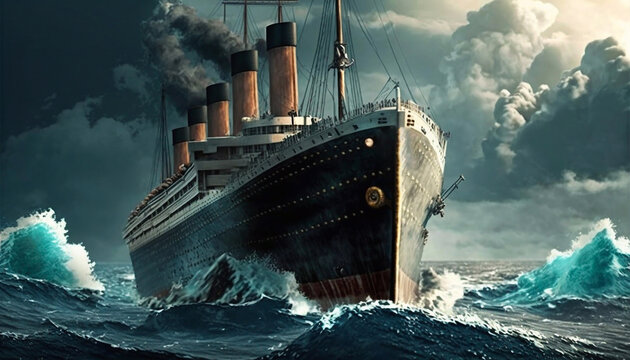

**Importing Essential Libraries**


In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Loading Dataset**

In [119]:
df_train=pd.read_csv('/content/titanic_train.csv')
df_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Data Preprocessing**

In [120]:
#First 5 values
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
#Last 5 values
df_train.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [122]:
#Shape
df_train.shape

(891, 12)

In [123]:
#Columns in training dataset
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [124]:
#Datatype of each column
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [125]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Checking Null Values**

In [126]:
df_train.duplicated().sum()

0

In [127]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [128]:
df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)


In [129]:
Sex=df_train['Sex'].value_counts()
Sex

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

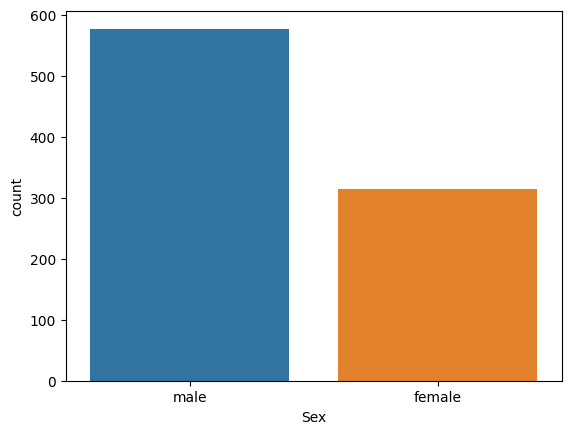

In [130]:
sns.countplot(x=df_train['Sex'],data=df_train)

In [131]:
Embarked=df_train['Embarked'].value_counts()
Embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64

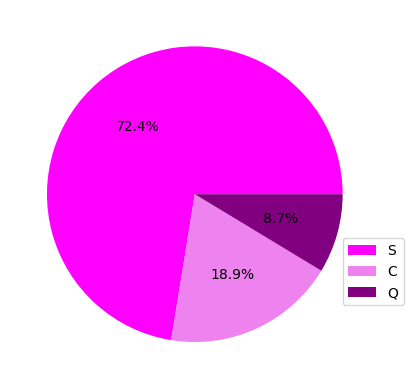

In [132]:
colors=['magenta','violet','purple']
plt.pie(Embarked,autopct='%1.1f%%',colors=colors)
plt.legend(Embarked.index,loc=(0.9,0.2))

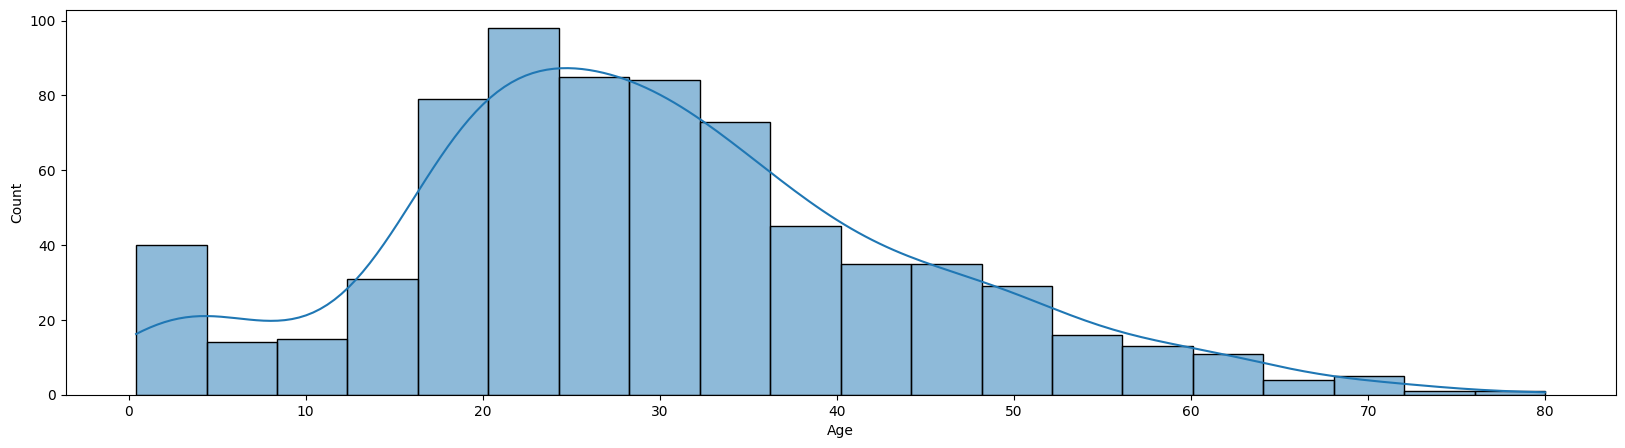

In [133]:
plt.figure(figsize=(20,5))
sns.histplot(df_train.Age,kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [134]:
survived=df_train['Survived'].value_counts()
survived

0    549
1    342
Name: Survived, dtype: int64

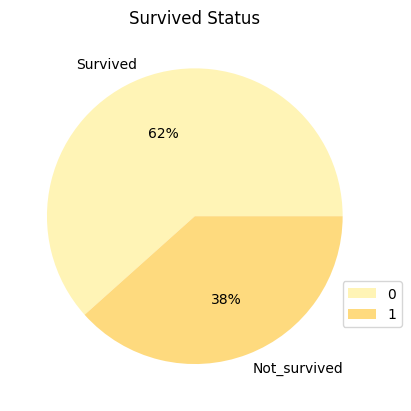

In [135]:
labels=['Survived','Not_survived']
plt.title("Survived Status")
plt.pie(survived,autopct='%1.0f%%',labels=labels,colors=sns.color_palette('YlOrBr'))
plt.legend(survived.index,loc=(0.9,0.2))

In [136]:
#Filling null values
df_train['Age']=df_train['Age'].fillna(df_train['Age'].mean())
df_train['Embarked']=df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

<ipython-input-137-c04d93bf24da>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df_train[column])
<ipython-input-137-c04d93bf24da>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(df_train[column])


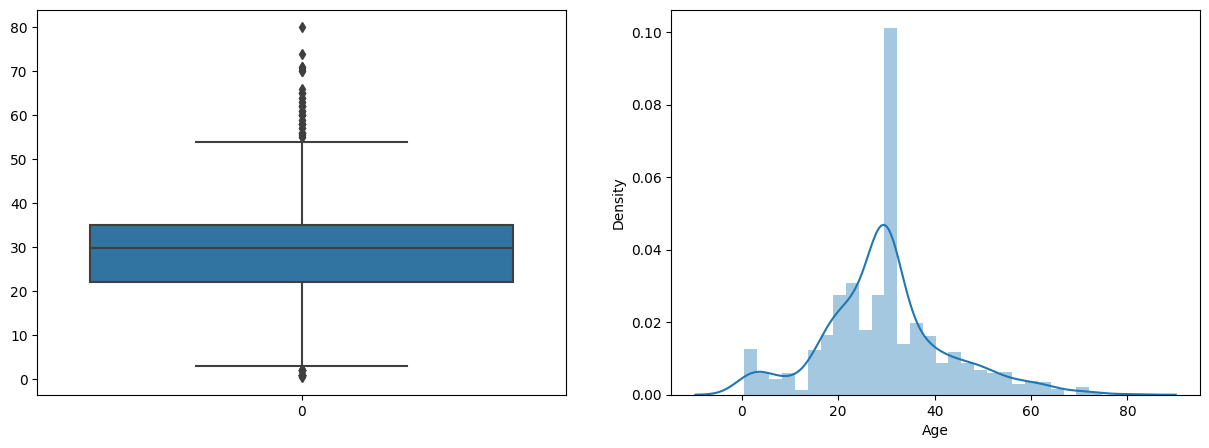

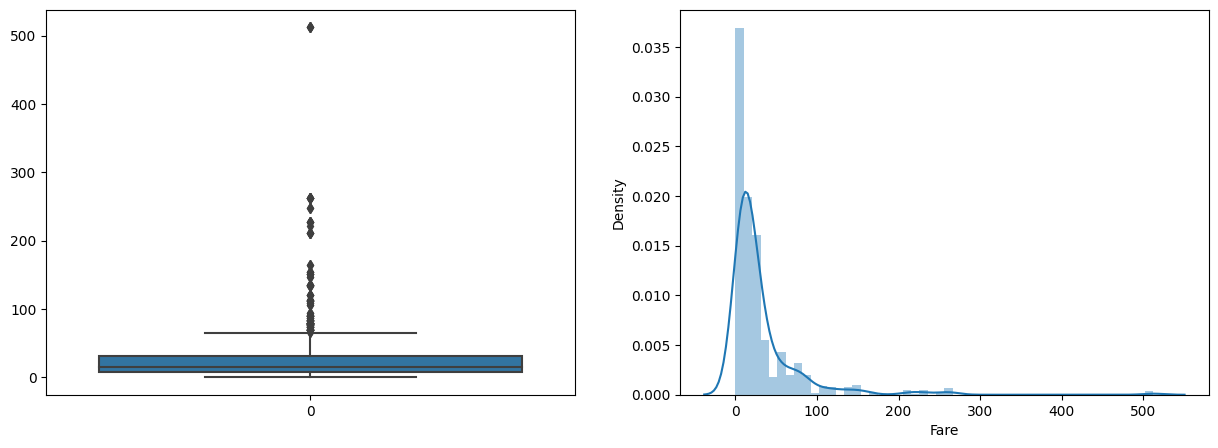

In [137]:
for column in ['Age','Fare']:
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  ax=sns.boxplot(df_train[column])

  plt.subplot(1,2,2)
  ax=sns.distplot(df_train[column])



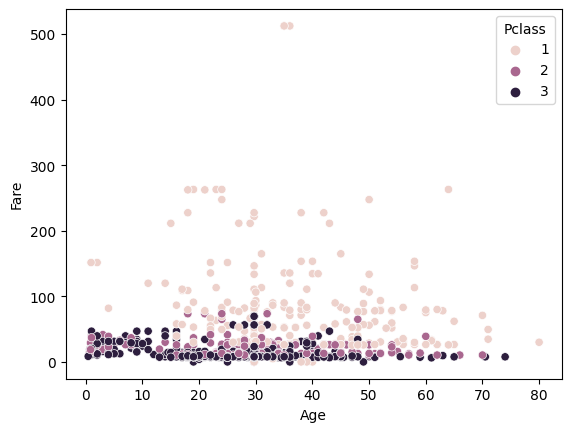

In [138]:
sns.scatterplot(data=df_train,x="Age",y="Fare",hue='Pclass')
plt.show()

<ipython-input-139-0ec06153534e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True,cmap='Blues')


<Axes: >

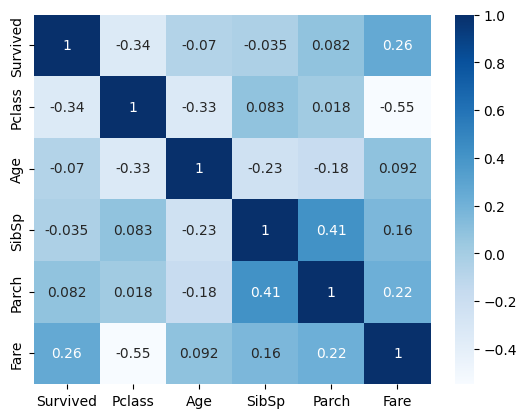

In [139]:
sns.heatmap(df_train.corr(),annot=True,cmap='Blues')

**Encoding categorical values to numerical**

In [140]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in ['Sex','Embarked']:
  df_train[i]=le.fit_transform(df_train[i])

**Splitting independent and dependent features**

In [141]:
x=df_train.drop(['Survived'],axis=1)
y=df_train['Survived']

In [142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
445,1,1,4.000000,0,2,81.8583,2
650,3,1,29.699118,0,0,7.8958,2
172,3,0,1.000000,1,1,11.1333,2
450,2,1,36.000000,1,2,27.7500,2
314,2,1,43.000000,1,1,26.2500,2
...,...,...,...,...,...,...,...
106,3,0,21.000000,0,0,7.6500,2
270,1,1,29.699118,0,0,31.0000,2
860,3,1,41.000000,2,0,14.1083,2
435,1,0,14.000000,1,2,120.0000,2


In [143]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,29.699118,1,1,15.2458,0
439,2,1,31.000000,0,0,10.5000,2
840,3,1,20.000000,0,0,7.9250,2
720,2,0,6.000000,0,1,33.0000,2
39,3,0,14.000000,1,0,11.2417,0
...,...,...,...,...,...,...,...
821,3,1,27.000000,0,0,8.6625,2
633,1,1,29.699118,0,0,0.0000,2
456,1,1,65.000000,0,0,26.5500,2
500,3,1,17.000000,0,0,8.6625,2


In [144]:
y_train

445    1
650    0
172    1
450    0
314    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 623, dtype: int64

In [145]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
821    1
633    0
456    0
500    0
430    1
Name: Survived, Length: 268, dtype: int64

In [146]:
#Model Creation
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [147]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0])

In [148]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_pred)
matrix

array([[137,  20],
       [ 30,  81]])

In [149]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [150]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [151]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Random Forest Accuracy:",accuracy_score(y_test,y_pred))
print('Classification Report')
print(classification_report(y_test,y_pred))


Random Forest Accuracy: 0.7910447761194029
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       157
           1       0.77      0.70      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [152]:
print("Random Forest Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

Random Forest Confusion Matrix
[[134  23]
 [ 33  78]]


In [153]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()
dec.fit(x_train,y_train)
y_pred=dec.predict(x_test)

In [154]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Decision Tree Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))


Decision Tree Accuracy: 0.7425373134328358
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       157
           1       0.69      0.68      0.69       111

    accuracy                           0.74       268
   macro avg       0.73      0.73      0.73       268
weighted avg       0.74      0.74      0.74       268



In [155]:
print("Decision Tree Confusion Matrix")
matrix=confusion_matrix(y_test,y_pred)
print(matrix)

Decision Tree Confusion Matrix
[[123  34]
 [ 35  76]]


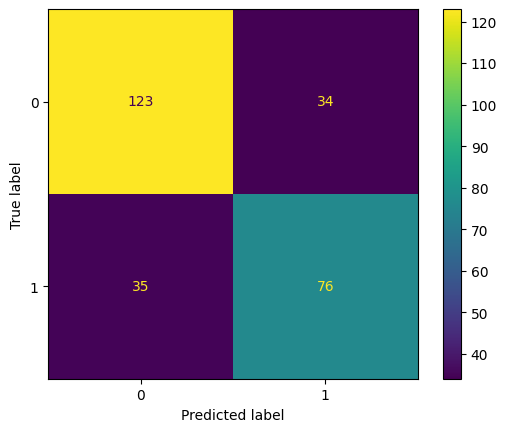

In [156]:
from sklearn.metrics import ConfusionMatrixDisplay
cmd=ConfusionMatrixDisplay(matrix,display_labels=[0,1])
cmd.plot()